In [1]:
# Regularizer
import torch
import matplotlib.pyplot as plt

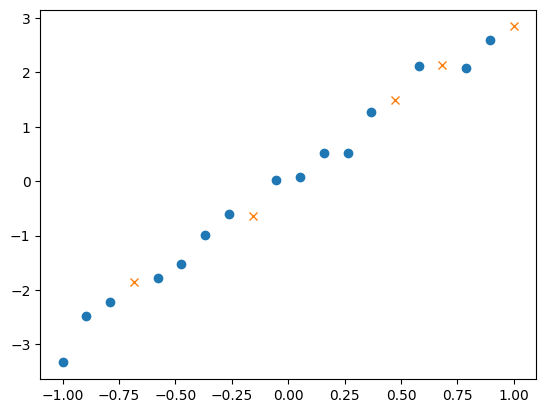

In [2]:
# Create a simple dataset
n_data = 20
n_train = 15
X = torch.linspace(-1,1,n_data).reshape(-1,1)
y = 3*X + torch.randn(n_data,1)*0.2

# Split data for training and testing
idx = torch.randperm(n_data)
X_train = X[idx[:n_train]]
y_train = y[idx[:n_train]]
X_test = X[idx[n_train:]]
y_test = y[idx[n_train:]]

# plot the data with different marker
plt.plot(X_train, y_train, 'o')
plt.plot(X_test, y_test, 'x')
plt.show()

X_mat=
 tensor([[ 1.0000e+00,  8.9474e-01,  8.0055e-01,  7.1629e-01,  6.4089e-01,
          5.7342e-01],
        [ 1.0000e+00, -7.8947e-01,  6.2327e-01, -4.9205e-01,  3.8846e-01,
         -3.0668e-01],
        [ 1.0000e+00,  1.5789e-01,  2.4931e-02,  3.9364e-03,  6.2154e-04,
          9.8138e-05],
        [ 1.0000e+00, -2.6316e-01,  6.9252e-02, -1.8224e-02,  4.7959e-03,
         -1.2621e-03],
        [ 1.0000e+00,  3.6842e-01,  1.3573e-01,  5.0007e-02,  1.8424e-02,
          6.7877e-03],
        [ 1.0000e+00, -5.2632e-02,  2.7701e-03, -1.4579e-04,  7.6734e-06,
         -4.0386e-07],
        [ 1.0000e+00, -4.7368e-01,  2.2438e-01, -1.0628e-01,  5.0345e-02,
         -2.3848e-02],
        [ 1.0000e+00,  5.2632e-02,  2.7701e-03,  1.4579e-04,  7.6734e-06,
          4.0386e-07],
        [ 1.0000e+00,  5.7895e-01,  3.3518e-01,  1.9405e-01,  1.1235e-01,
          6.5042e-02],
        [ 1.0000e+00,  7.8947e-01,  6.2327e-01,  4.9205e-01,  3.8846e-01,
          3.0668e-01],
        [ 1.0000e+00, 

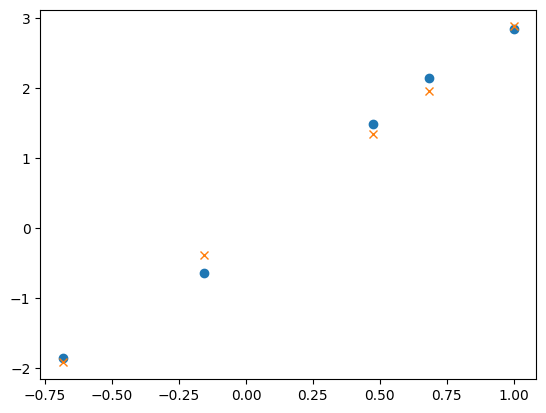

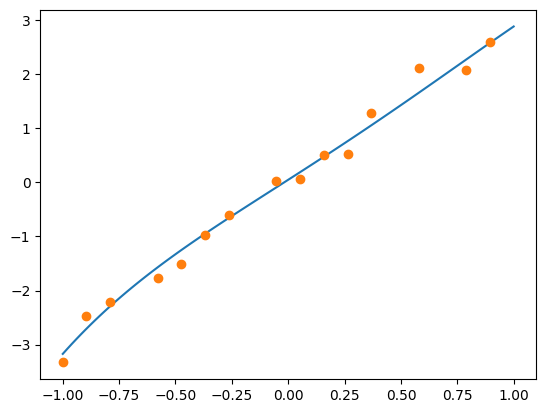

In [24]:
# By differentiating the matirx equation
# theta = (X^T * X + delta^2 * I)^-1 * X^T * y

X_mat = torch.cat([torch.ones_like(X_train), X_train, X_train**2, X_train**3, X_train**4, X_train**5], 1)
print("X_mat=\n", X_mat)

delta = 0.1
regularizer = delta * torch.eye(X_mat.shape[1])
theta = torch.inverse(X_mat.t().mm(X_mat) + regularizer).mm(X_mat.t()).mm(y_train)
print("theta=\n", theta)

# Predict
X_test_mat = torch.cat([torch.ones_like(X_test), X_test, X_test**2, X_test**3, X_test**4, X_test**5], 1)
y_test_pred = X_test_mat.mm(theta)
# Print the test loss and plot the data
print('Test loss: ', torch.mean((y_test - y_test_pred)**2))
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()

# Plot the learned function
X_plot = torch.linspace(-1,1,100).reshape(-1,1)
X_plot_poly = torch.cat((torch.ones(100,1), X_plot, X_plot**2, X_plot**3, X_plot**4, X_plot**5), 1)
y_plot = X_plot_poly.mm(theta)
plt.plot(X_plot, y_plot)
plt.plot(X_train, y_train, 'o')

epoch 0, loss 3.310797691345215
epoch 10, loss 0.35267239809036255
epoch 20, loss 0.11893024295568466
epoch 30, loss 0.09194710850715637
epoch 40, loss 0.08312603831291199
epoch 50, loss 0.076991006731987
epoch 60, loss 0.07195205241441727
epoch 70, loss 0.06766237318515778
epoch 80, loss 0.0639551430940628
epoch 90, loss 0.060723498463630676
Test loss:  0.10056100785732269


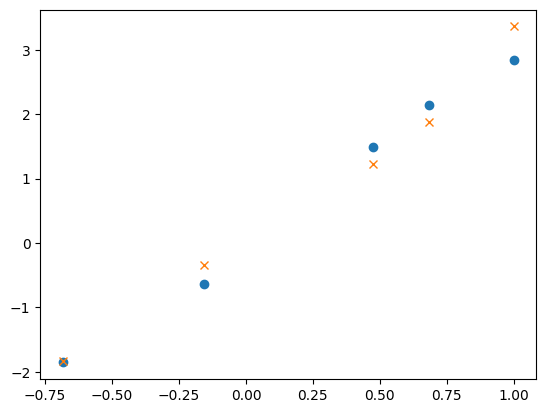

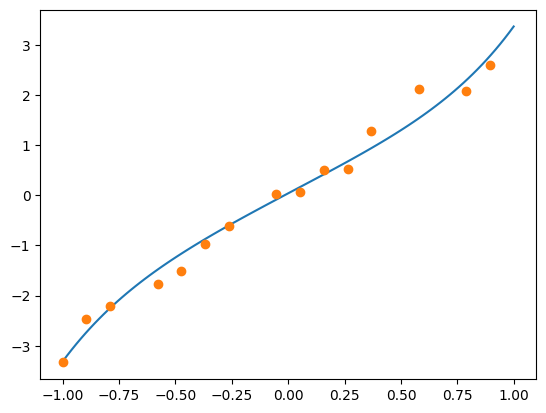

In [28]:
# Create a linear regression model with 5th polynomial and L2 regularization
X_train_poly = torch.cat((torch.ones(n_train,1), X_train, X_train**2, X_train**3, X_train**4, X_train**5), 1)
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1)
)

# Define the loss function and optimizer with L2 regularization
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=0.0001)

# Train the model
for epoch in range(100):
    # Compute predictions by calling model
    pred_y = model(X_train_poly)
 
    # Compute loss
    loss = criterion(pred_y, y_train)
 
    # Calculate gradients by running the backpropagation
    optimizer.zero_grad()
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print the loss after every 10 epoch
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

# Test the model
y_test_pred = model(torch.cat((torch.ones(n_data-n_train,1), X_test, X_test**2, X_test**3, X_test**4, X_test**5), 1))

# Print the test loss and plot the data
print('Test loss: ', criterion(y_test_pred, y_test).item())
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()

# Plot the model
X_plot = torch.linspace(-1,1,100).reshape(-1,1)
X_plot_poly = torch.cat((torch.ones(100,1), X_plot, X_plot**2, X_plot**3, X_plot**4, X_plot**5), 1)
y_plot = model(X_plot_poly)
plt.plot(X_plot, y_plot.data)
plt.plot(X_train, y_train, 'o')

epoch 0, loss 3.432030439376831
epoch 10, loss 0.30286067724227905
epoch 20, loss 0.11700090765953064
epoch 30, loss 0.09175317734479904
epoch 40, loss 0.08222604542970657
epoch 50, loss 0.07578495889902115
epoch 60, loss 0.07075671851634979
epoch 70, loss 0.06663081049919128
epoch 80, loss 0.06314808875322342
epoch 90, loss 0.06015501171350479
Test loss:  0.10268751531839371


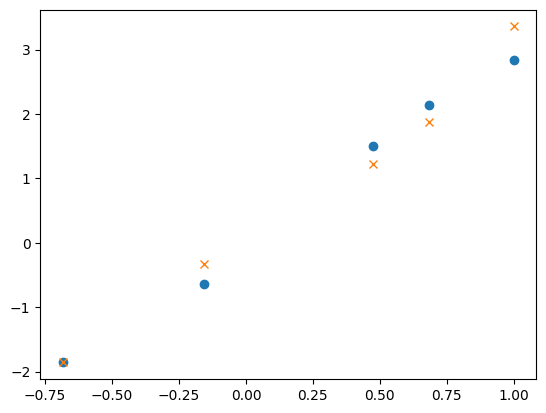

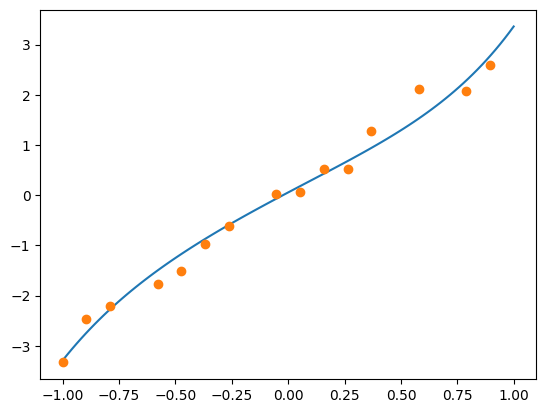

In [29]:
# Create a linear regression model with 5th polynomial without L2 regularization
X_train_poly = torch.cat((torch.ones(n_train,1), X_train, X_train**2, X_train**3, X_train**4, X_train**5), 1)
model = torch.nn.Sequential(
    torch.nn.Linear(6, 1)
)

# Define the loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    # Compute predictions by calling model
    pred_y = model(X_train_poly)
 
    # Compute loss
    loss = criterion(pred_y, y_train)
 
    # Calculate gradients by running the backpropagation
    optimizer.zero_grad()
    loss.backward()

    # Update the model parameters
    optimizer.step()

    # Print the loss after every 10 epoch
    if epoch % 10 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

# Test the model
y_test_pred = model(torch.cat((torch.ones(n_data-n_train,1), X_test, X_test**2, X_test**3, X_test**4, X_test**5), 1))

# Print the test loss and plot the data
print('Test loss: ', criterion(y_test_pred, y_test).item())
plt.plot(X_test, y_test, 'o')
plt.plot(X_test, y_test_pred.data, 'x')
plt.show()

# Plot the model
X_plot = torch.linspace(-1,1,100).reshape(-1,1)
X_plot_poly = torch.cat((torch.ones(100,1), X_plot, X_plot**2, X_plot**3, X_plot**4, X_plot**5), 1)
y_plot = model(X_plot_poly)
plt.plot(X_plot, y_plot.data)
plt.plot(X_train, y_train, 'o')